In [ ]:
"""
[V1]
* resnest50_fast_2s2x40d
* Add Max./Min. Channels

[V2]
* resnest50_fast_2s2x40d
* final_drop = 0.2
* dropblock_prob = 0.0

[TODO]
* Separate gene expression, cell vaibility and other features
* PCGrad (Project Conflicting Gradients)
* Tuning resolution and image size

ResNeSt:
https://github.com/zhanghang1989/ResNeSt
"""

In [1]:
import plotly.graph_objects as go
from sklearn.manifold import TSNE
from sklearn.datasets import load_breast_cancer
import numpy as np

# 創建數據和目標變量
data = load_breast_cancer()
X = data.data
y = data.target

# 使用t-SNE進行降維
tsne = TSNE(n_components=3)  # 指定要降維到的維度數量為3
X_tsne = tsne.fit_transform(X)

# 創建3D散點圖
fig = go.Figure()

colors = ['red', 'blue']  # 兩個類別的顏色
# 添加目標變量的不同類別到圖例中
classes = np.unique(y)
for cls in classes:
    indices = np.where(y == cls)[0]
    fig.add_trace(go.Scatter3d(
        x=X_tsne[indices, 0],
        y=X_tsne[indices, 1],
        z=X_tsne[indices, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=colors[cls],  # 使用索引作為顏色編碼
            colorscale='Viridis',
            opacity=0.8
        ),
        name=f'Target {cls}'  # 添加類別到圖例中
    ))

# 設置圖形佈局
fig.update_layout(scene=dict(
    xaxis_title='Component 1',
    yaxis_title='Component 2',
    zaxis_title='Component 3'
))

# 顯示圖形
fig.show()

/Users/yukaisun/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/yukaisun/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


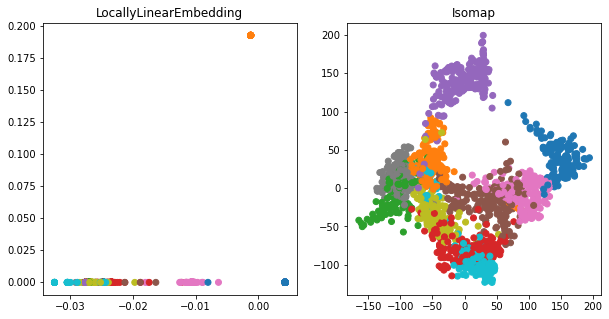

In [1]:
from sklearn.manifold import LocallyLinearEmbedding, Isomap
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# 加载示例数据
digits = load_digits()
X = digits.data
y = digits.target

# 使用LocallyLinearEmbedding进行降维
lle = LocallyLinearEmbedding(n_components=2)
X_lle = lle.fit_transform(X)

# 使用Isomap进行降维
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X)

# 绘制降维结果
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y, cmap='tab10')
plt.title('LocallyLinearEmbedding')
plt.subplot(1, 2, 2)
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y, cmap='tab10')
plt.title('Isomap')
plt.show()
